

# <center>🌼 Multiclass Flowers Classification with VGG16 and Transfer Learning 🌸</center></h1>


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

## Load Data

In [3]:
# Loading images and Labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], # Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels, Ensures the dataset is loaded as tuples of (image, label).
)

## Image Preprocessing

In [4]:
# Check existing image size
train_ds[0].shape

TensorShape([442, 1024, 3])

In [5]:
# Resizing Images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [6]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [7]:
# Transforming labels to correct format  # One-hot encoding with the help of  to_categorical function.
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [8]:
train_labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

#Use Pretrained VGG16 Image Classification Model

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
train_ds[0].shape # We have rescale on 150, 150

TensorShape([150, 150, 3])

In [11]:
# Loading VGG16 model, Create VGG16 Model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)  #input_shape=(150, 150, 3)

In [12]:
# We will not train base_model
base_model.trainable = False   # Freeze the base model

In [13]:
# Preprocessing Input, Preprocess input for VGG16
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [14]:
# Model Details
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# Add our layers on top of this Model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

In [16]:
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

In [20]:
#model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])
model.fit(
    train_ds, train_labels,
    validation_data=(test_ds, test_labels),
    epochs=50,
    batch_size=32,
    callbacks=[es]
)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - accuracy: 0.7066 - loss: 0.7792 - val_accuracy: 0.7775 - val_loss: 0.6284
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.7802 - loss: 0.6073 - val_accuracy: 0.8220 - val_loss: 0.4718
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8200 - loss: 0.4780 - val_accuracy: 0.8619 - val_loss: 0.3803
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8616 - loss: 0.3735 - val_accuracy: 0.8728 - val_loss: 0.3600
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8886 - loss: 0.3255 - val_accuracy: 0.9155 - val_loss: 0.2371
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9233 - loss: 0.2299 - val_accuracy: 0.9237 - val_loss: 0.2067
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9196 - loss: 0.2227 - val_accuracy: 0.9428 - val_loss: 0.1579
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9391 - loss: 0.1602 - val_accuracy: 0.9455

## **Evaluate the Model :**  Use the test dataset to measure the final accuracy and loss

In [22]:
test_loss, test_accuracy = model.evaluate(test_ds, test_labels, batch_size=32)
print(f"Test Accuracy: {test_accuracy:.2%}, Test Loss: {test_loss:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9889 - loss: 0.0252
Test Accuracy: 99.09%, Test Loss: 0.0269


## **Visualize Results :** Plot training history for better insight

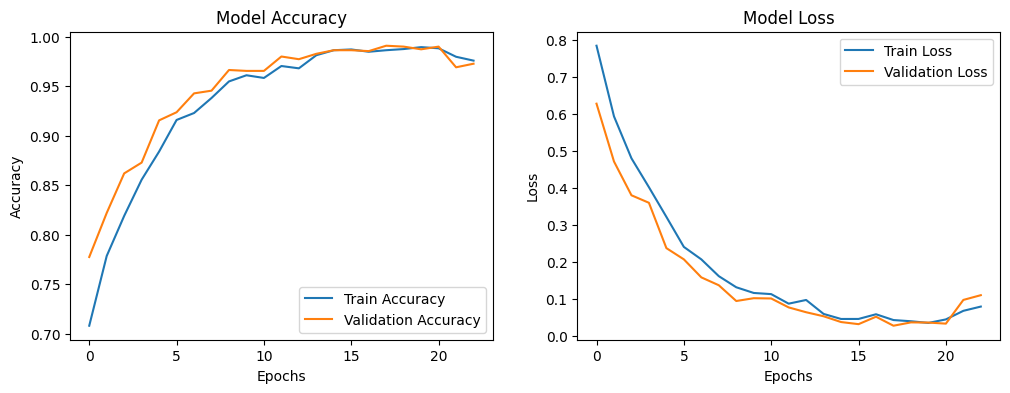

In [21]:
import matplotlib.pyplot as plt

history = model.history.history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


**The training and validation accuracies steadily increase and converge at a high value.\
The model reaches validation accuracy close to 99%, indicating excellent performance.**

- **Dataset :**  TF Flowers (5 classes of flowers).
- **Architecture :**  VGG16 with transfer learning and custom dense layers.
- **Results :**  Achieved 99.09% validation accuracy.